<a href="https://colab.research.google.com/github/Barbara-Morais/Exercicios-Bootcamp/blob/main/Sistemas_de_Recomenda%C3%A7%C3%A3o_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#Content-based Recommender Systems

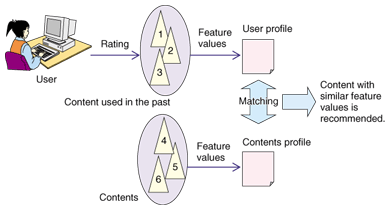

In [2]:
import pandas as pd
import numpy as np


In [3]:
df_title_basics = pd.read_csv('IMDb_movies.csv')
df_title_basics.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
df_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
df_title_basics['year'].values

array([1894, 1906, 1911, ..., '2019', '2019', '2019'], dtype=object)

In [6]:
df_types = df_title_basics.year.map(type)
df_types

0        <class 'int'>
1        <class 'int'>
2        <class 'int'>
3        <class 'int'>
4        <class 'int'>
             ...      
85850    <class 'str'>
85851    <class 'str'>
85852    <class 'str'>
85853    <class 'str'>
85854    <class 'str'>
Name: year, Length: 85855, dtype: object

## Como usaremos o ano (year) como parâmetro de filtragem foi necessário "dropar" uma linha que tinha um conteúdo que não representava a informação de ano. 



In [7]:
index = df_title_basics['year'].str.match('[A-Z]') 

kx=[]
for i in range(len(index)): 
    if index[i] == True:
        kx.append(i)
      

for i in range(len(kx)):
    df_title_basics = df_title_basics.drop(index = kx[i])


## Seleciono os filmes : 

* A partir de 1950 
* Feitos nos USA
* Avg_vote > 7.5 
* Título, Gênero

In [8]:
df_title_basics[["year"]] = df_title_basics[["year"]].apply(pd.to_numeric)
df_temp = df_title_basics[(df_title_basics['year'] > 1950)\
                          & (df_title_basics['country'] == 'USA')\
                          & (df_title_basics['avg_vote'] > 7.5) ]
movies_df = df_temp[['original_title','genre']]

In [9]:
movies_df.tail()

,original_title,genre
85093,Dark Waters,"Biography, Drama, History"
85141,Michael Jackson: Smooth Criminal (II),"Action, Crime, Fantasy"
85151,Breaking Fast,"Comedy, Drama"
85518,The Guy Who Didn't Like Musicals,"Comedy, Musical"
85744,Apollo: Missions to the Moon,History


In [10]:
#movies_df.reset_index(inplace=True)


In [11]:
movies_df.tail()

,original_title,genre
85093,Dark Waters,"Biography, Drama, History"
85141,Michael Jackson: Smooth Criminal (II),"Action, Crime, Fantasy"
85151,Breaking Fast,"Comedy, Drama"
85518,The Guy Who Didn't Like Musicals,"Comedy, Musical"
85744,Apollo: Missions to the Moon,History


In [12]:
movies_df.genre.values[603]

'Comedy, Musical'

## Verifica-se se há duplicatas no Frame 

In [13]:
movies_df.duplicated().sum()

0

In [14]:
movies_df = movies_df.drop_duplicates()

## Transforma as informações de genero em uma lista usando o método split

In [15]:
movies_df['genre'] = movies_df.genre.str.split(', ')
movies_df.tail()

,original_title,genre
85093,Dark Waters,"[Biography, Drama, History]"
85141,Michael Jackson: Smooth Criminal (II),"[Action, Crime, Fantasy]"
85151,Breaking Fast,"[Comedy, Drama]"
85518,The Guy Who Didn't Like Musicals,"[Comedy, Musical]"
85744,Apollo: Missions to the Moon,[History]


## Para cada genero é criado uma coluna e seu valor será 1 se presente ou 0 se ausente nas descrições de cada filme.

In [16]:
moviesWithGenres_df = movies_df.copy()
for index, row in movies_df.iterrows():
    for genre in row['genre']:
        moviesWithGenres_df.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres_df = moviesWithGenres_df.fillna(0)
moviesWithGenres_df.tail()

,original_title,genre,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
85093,Dark Waters,"[Biography, Drama, History]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
85141,Michael Jackson: Smooth Criminal (II),"[Action, Crime, Fantasy]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
85151,Breaking Fast,"[Comedy, Drama]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85518,The Guy Who Didn't Like Musicals,"[Comedy, Musical]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85744,Apollo: Missions to the Moon,[History],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Podemos agora "dropar" a coluna genre. Ela não será mais usada.

In [17]:
moviesWithGenres_df = moviesWithGenres_df.drop(columns='genre')
moviesWithGenres_df.head()

,original_title,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
6752,Ace in the Hole,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6793,The Day the Earth Stood Still,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6798,Detective Story,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6979,A Place in the Sun,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7024,Strangers on a Train,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
moviesWithGenres_df[moviesWithGenres_df['original_title'].str.contains("Matrix")]

,original_title,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
32229,The Matrix,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Vamos criar um DataFrame com as informações coletadas de um usuário (Filme e Nota) 

In [19]:
userInput = [
            {'original_title':'A Beautiful Mind', 'rating':7.0},
            {'original_title':'The Irishman', 'rating':3.5},
            {'original_title':'The Godfather', 'rating':7.0},
            {'original_title':"Captain America: Civil War", 'rating':5},
            {'original_title':'Star Wars', 'rating':8.5},
            {'original_title':'The Matrix', 'rating':8.5} 
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,original_title,rating
0,A Beautiful Mind,7.0
1,The Irishman,3.5
2,The Godfather,7.0
3,Captain America: Civil War,5.0
4,Star Wars,8.5
5,The Matrix,8.5


## Buscamos no Dataframe todos os filmes do usuário e fazemos um merge para criar um novo dataframe - ao final teremos um Dataframe contendo também as informações de generos. 

In [20]:
inputId = movies_df[movies_df['original_title'].isin(inputMovies['original_title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
inputMovies

,original_title,genre,rating
0,The Godfather,"[Crime, Drama]",7.0
1,Star Wars,"[Action, Adventure, Fantasy]",8.5
2,The Matrix,"[Action, Sci-Fi]",8.5
3,A Beautiful Mind,"[Biography, Drama]",7.0
4,The Irishman,"[Biography, Crime, Drama]",3.5
5,Captain America: Civil War,"[Action, Adventure, Sci-Fi]",5.0


## Buscamos no Dataframe (movies_genres) todos os filmes do usuário 

In [21]:
userMovies = moviesWithGenres_df[moviesWithGenres_df['original_title'].isin(inputMovies['original_title'].tolist())]
userMovies

,original_title,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
15528,The Godfather,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18216,Star Wars,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
32229,The Matrix,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39274,A Beautiful Mind,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56680,The Irishman,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
71476,Captain America: Civil War,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Podemos eliminar a coluna 'original_title' - por que ? Porque estamos montando o modelo baseado nos gêneros


In [22]:
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('original_title', 1)
userGenreTable

,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
inputMovies['rating']

0    7.0
1    8.5
2    8.5
3    7.0
4    3.5
5    5.0
Name: rating, dtype: float64

## Criamos o userProfile multiplicando as Tabelas de generos do usuário X ratings 

In [24]:
#userGenreTable.transpose()

In [25]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Drama        17.5
Film-Noir     0.0
Sci-Fi       13.5
Crime        10.5
Romance       0.0
Thriller      0.0
Adventure    13.5
Western       0.0
Music         0.0
Comedy        0.0
Musical       0.0
War           0.0
Mystery       0.0
Family        0.0
Horror        0.0
History       0.0
Action       22.0
Biography    10.5
Sport         0.0
Fantasy       8.5
Animation     0.0
dtype: float64

## Buscamos todos os generos para os filmes da Tabela original

In [26]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres_df.set_index(moviesWithGenres_df['original_title'])
#And drop the unnecessary information
genreTable = genreTable.drop('original_title', 1)
genreTable

,Drama,Film-Noir,Sci-Fi,Crime,Romance,Thriller,Adventure,Western,Music,Comedy,Musical,War,Mystery,Family,Horror,History,Action,Biography,Sport,Fantasy,Animation
original_title,,,,,,,,,,,,,,,,,,,,,
Ace in the Hole,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Day the Earth Stood Still,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Detective Story,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Place in the Sun,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Strangers on a Train,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dark Waters,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Michael Jackson: Smooth Criminal (II),0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Breaking Fast,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## A tabela de recomendação será o produto da Tabela de genreTable x  Tabela UserProfile

In [27]:
recommendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable_df

original_title
Ace in the Hole                          0.182292
The Day the Earth Stood Still            0.322917
Detective Story                          0.291667
A Place in the Sun                       0.182292
Strangers on a Train                     0.109375
                                           ...   
Dark Waters                              0.291667
Michael Jackson: Smooth Criminal (II)    0.427083
Breaking Fast                            0.182292
The Guy Who Didn't Like Musicals         0.000000
Apollo: Missions to the Moon             0.000000
Length: 605, dtype: float64

In [28]:
recommendationTable_df = recommendationTable_df.sort_values(ascending=False)
#Just a peek at the values
recommendationTable_df.head(50)

original_title
Avengers: Endgame                                         0.552083
Logan                                                     0.552083
Star Trek: First Contact                                  0.552083
The Last of the Mohicans                                  0.552083
Only the Brave                                            0.520833
Badlands                                                  0.520833
Hell or High Water                                        0.520833
3:10 to Yuma                                              0.520833
Ford v Ferrari                                            0.520833
The French Connection                                     0.520833
Loyalty & Respect                                         0.520833
End of Watch                                              0.520833
The Fugitive                                              0.520833
Tombstone                                                 0.520833
Star Trek Into Darkness                        